In [437]:
import numpy as np 
import pandas as pd 
import copy 
import seaborn as sns 
import matplotlib.pyplot as plt

In [438]:
data = pd.read_csv('dollar.csv')

In [439]:
data.loc[data[data['year'] == '1401 *'].index[0], 'year'] = '1401'

In [440]:
data['year'] = data['year'].apply(lambda y : float(y))

In [441]:
data

,year,dollar market price,dollar official price,Price difference ratio,annual growth ratio
0,1353.0,7.00000,7,1.000000,-
1,1354.0,7.00000,7,1.000000,0.0%
2,1355.0,7.00000,7,1.000000,0.0%
3,1356.0,7.00000,7,1.000000,0.0%
4,1357.0,10.00000,7,1.428571,42.9%
5,1358.0,14.00000,7,2.000000,40.0%
6,1359.0,20.00000,7,2.857143,42.9%
7,1360.0,27.00000,7,3.857143,35.0%
8,1361.0,35.00000,7,5.000000,29.6%
9,1362.0,45.00000,7,6.428571,28.6%


In [442]:
X = []  
year = [] 
data['year'].apply(lambda d: X.append([1, float(d)])) 
data['year'].apply(lambda d: year.append(int(d)))
X = np.array(X)   

y = np.array(data[['dollar market price', 'dollar official price']])   

In [443]:
def normalize(arr):   
    return (arr - arr.min()) / (arr.max() - arr.min()) 

In [444]:
def denormalize(arr, prev_max, prev_min):
    return (arr * (prev_max - prev_min)) + prev_min

In [445]:
X[:,1] = normalize(X[:, 1]) 
y[:,0], y[:,1] = normalize(y[:, 0]), normalize(y[:, 1]) 

In [446]:
def loss(X, y, w):  
    size = len(X)
    cost = 0
    for i in range(size): 
        cost += (np.dot(w, X[i]) - y[i]) ** 2 
    
    return cost / size

In [447]:
def gradient_descent(X, y, alpha): 
    
    dim = len(X[0]) 
    size = len(X) 
    w_old = np.zeros(dim) 
    w_new = np.ones(dim)
    
    norm = 1000
    while norm > 0.001:  
        for j in range(dim):  
            term = 0 
            for i in range(size): 
                term += (np.dot(w_old, X[i]) - y[i]) * X[i][j]   
            w_new[j] = w_old[j] - (alpha * term / size)     
        norm = np.linalg.norm(w_new - w_old)    
        w_old = copy.deepcopy(w_new)  
    return w_new        

In [473]:
w = gradient_descent(X, y[:, 0], 0.1) 
linear_market_y = []
for x in X:
    linear_market_y.append(np.dot(w,x)) 
linear_market_price_p = denormalize(np.array(linear_market_y), float(data['dollar market price'].max()), float(data['dollar market price'].min()))    
linear_market_price_p 

array([-1657.07629125, -1459.95164317, -1262.8269951 , -1065.70234703,
        -868.57769896,  -671.45305088,  -474.32840281,  -277.20375474,
         -80.07910667,   117.04554141,   314.17018948,   511.29483755,
         708.41948562,   905.5441337 ,  1102.66878177,  1299.79342984,
        1496.91807791,  1694.04272599,  1891.16737406,  2088.29202213,
        2285.4166702 ,  2482.54131828,  2679.66596635,  2876.79061442,
        3073.91526249,  3271.03991057,  3468.16455864,  3665.28920671,
        3862.41385478,  4059.53850286,  4256.66315093,  4453.787799  ,
        4650.91244707,  4848.03709515,  5045.16174322,  5242.28639129,
        5439.41103936,  5636.53568744,  5833.66033551,  6030.78498358,
        6227.90963165,  6425.03427973,  6622.1589278 ,  6819.28357587,
        7016.40822395,  7213.53287202,  7410.65752009,  7607.78216816,
        7804.90681624])

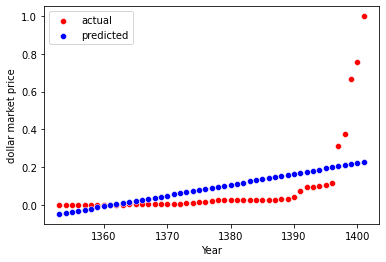

In [474]:
sns.scatterplot(x=year, y=y[:, 0], color='red', label='actual')
sns.scatterplot(x=year, y=linear_market_y, color='blue', label='predicted')

plt.xlabel('Year')
plt.ylabel('dollar market price')
plt.legend()

Text(0, 0.5, 'dollar market price')

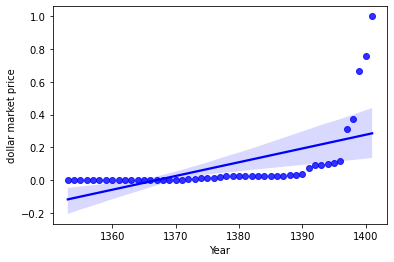

In [475]:
sns.regplot(x=year, y=y[:, 0], color='blue', label='Scatter Plot with Regression Line')

plt.xlabel('Year')
plt.ylabel('dollar market price')

In [476]:
w = gradient_descent(X, y[:, 1], 0.1) 
linear_official_y = []
for x in X:
    linear_official_y.append(np.dot(w,x))   
linear_official_price_p = denormalize(np.array(linear_official_y), float(data['dollar official price'].max()), float(data['dollar official price'].min()))    
linear_official_price_p    

array([-7.04868447e+02, -6.34128034e+02, -5.63387620e+02, -4.92647207e+02,
       -4.21906793e+02, -3.51166380e+02, -2.80425966e+02, -2.09685553e+02,
       -1.38945139e+02, -6.82047256e+01,  2.53568788e+00,  7.32761014e+01,
        1.44016515e+02,  2.14756928e+02,  2.85497342e+02,  3.56237755e+02,
        4.26978169e+02,  4.97718582e+02,  5.68458996e+02,  6.39199409e+02,
        7.09939823e+02,  7.80680236e+02,  8.51420650e+02,  9.22161064e+02,
        9.92901477e+02,  1.06364189e+03,  1.13438230e+03,  1.20512272e+03,
        1.27586313e+03,  1.34660354e+03,  1.41734396e+03,  1.48808437e+03,
        1.55882479e+03,  1.62956520e+03,  1.70030561e+03,  1.77104603e+03,
        1.84178644e+03,  1.91252685e+03,  1.98326727e+03,  2.05400768e+03,
        2.12474809e+03,  2.19548851e+03,  2.26622892e+03,  2.33696933e+03,
        2.40770975e+03,  2.47845016e+03,  2.54919057e+03,  2.61993099e+03,
        2.69067140e+03])

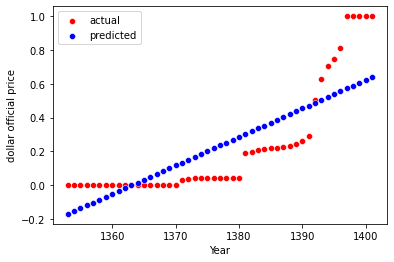

In [477]:
sns.scatterplot(x=year, y=y[:, 1], color='red', label='actual')
sns.scatterplot(x=year, y=linear_official_y, color='blue', label='predicted')

plt.xlabel('Year')
plt.ylabel('dollar official price')
plt.legend()

Text(0, 0.5, 'dollar official price')

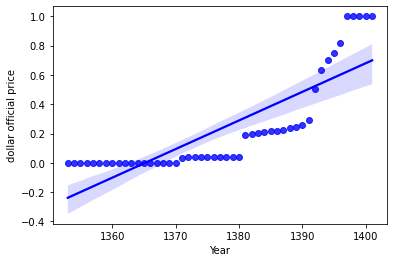

In [478]:
sns.regplot(x=year, y=y[:, 1], color='blue', label='Scatter Plot with Regression Line')

plt.xlabel('Year')
plt.ylabel('dollar official price')

In [454]:
def power(vector, n): 
    value = vector[1]
    return np.array([value ** i for i in range(n+1)])

In [455]:
def poly_gradient_descent(X, y, n, alpha): 
    
    dim = n + 1 
    size = len(X) 
    w_old = np.zeros(dim) 
    w_new = np.ones(dim)
    
    norm = 1000
    while norm > 0.001: 
        for j in range(dim):  
            term = 0 
            for i in range(size):  
                term += (np.dot(w_old, power(X[i], n)) - y[i]) * power(X[i], n)[j]   
            w_new[j] = w_old[j] - (alpha * term / size)     
        norm = np.linalg.norm(w_new - w_old)    
        w_old = copy.deepcopy(w_new)  
    return w_new    

In [479]:
w = poly_gradient_descent(X, y[:, 0], 10, 0.1) 
poly_market_y = []
for x in X:
    poly_market_y.append(np.dot(w, power(x, 10))) 
poly_market_price_p = denormalize(np.array(poly_market_y), float(data['dollar market price'].max()), float(data['dollar market price'].min()))    
poly_market_price_p    

array([ -676.22303041,  -686.64311094,  -696.53262201,  -705.79721604,
        -714.3296244 ,  -722.00775578,  -728.69247851,  -734.22502737,
        -738.42396352,  -741.08160221,  -741.95980606,  -740.78502268,
        -737.24242317,  -730.9689728 ,  -721.54523648,  -708.48568943,
        -691.22726715,  -669.11584876,  -641.39032306,  -607.16383751,
        -565.40177644,  -514.89595564,  -454.23445626,  -381.76645094,
        -295.56129961,  -193.36111049,   -72.52587416,    70.02981608,
         237.90954544,   435.31855641,   667.15923649,   939.1400491 ,
        1257.89947232,  1631.14664865,  2067.82059571,  2578.26998249,
        3174.45563991,  3870.17814678,  4681.33301395,  5626.19618082,
        6725.74273871,  8004.00200662,  9488.45230513, 11210.45900559,
       13205.75967309, 15515.00037409, 18184.32748333, 21266.03959893,
       24819.30446128])

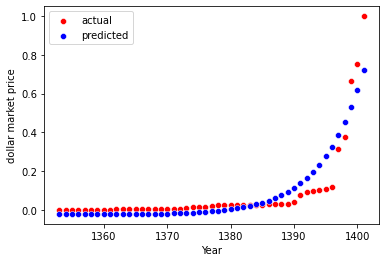

In [480]:
sns.scatterplot(x=year, y=y[:, 0], color='red', label='actual')
sns.scatterplot(x=year, y=poly_market_y, color='blue', label='predicted')

plt.xlabel('Year')
plt.ylabel('dollar market price')
plt.legend()

In [481]:
w = poly_gradient_descent(X, y[:, 1], 10, 0.1) 
poly_official_y = []
for x in X:
    poly_official_y.append(np.dot(w, power(x, 10))) 
poly_official_price_p = denormalize(np.array(poly_official_y), float(data['dollar market price'].max()), float(data['dollar market price'].min()))    
poly_official_price_p    

array([-7.88963183e+02, -7.08874340e+02, -6.24305195e+02, -5.34947990e+02,
       -4.40467985e+02, -3.40500513e+02, -2.34647647e+02, -1.22474417e+02,
       -3.50450475e+00,  1.22784669e+02,  2.56967555e+02,  3.99676908e+02,
        5.51611165e+02,  7.13542937e+02,  8.86328771e+02,  1.07092041e+03,
        1.26837775e+03,  1.47988384e+03,  1.70676209e+03,  1.95049619e+03,
        2.21275299e+03,  2.49540886e+03,  2.80058001e+03,  3.13065721e+03,
        3.48834566e+03,  3.87671060e+03,  4.29922934e+03,  4.75985062e+03,
        5.26306214e+03,  5.81396726e+03,  6.41837185e+03,  7.08288258e+03,
        7.81501783e+03,  8.62333257e+03,  9.51755882e+03,  1.05087631e+04,
        1.16095229e+04,  1.28341235e+04,  1.41987781e+04,  1.57218720e+04,
        1.74242349e+04,  1.93294420e+04,  2.14641482e+04,  2.38584568e+04,
        2.65463266e+04,  2.95660204e+04,  3.29605986e+04,  3.67784602e+04,
        4.10739374e+04])

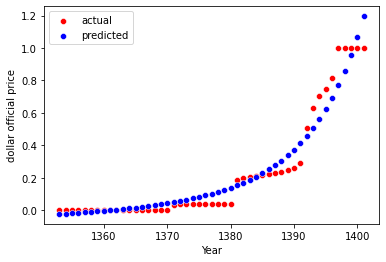

In [482]:
sns.scatterplot(x=year, y=y[:, 1], color='red', label='actual')
sns.scatterplot(x=year, y=poly_official_y, color='blue', label='predicted')

plt.xlabel('Year')
plt.ylabel('dollar official price')
plt.legend()

In [488]:
ratio = np.array(poly_market_y) / np.array(poly_official_y) 

<AxesSubplot:ylabel='Price difference ratio'>

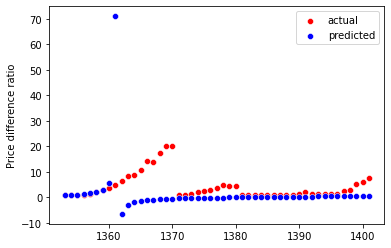

In [489]:
sns.scatterplot(x=year, y=data['Price difference ratio'], color='red', label='actual')
sns.scatterplot(x=year, y=ratio, color='blue', label='predicted')

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
m = LinearRegression()

In [8]:
x = np.array([1, 2, 6]).reshape(-1, 1)
y = np.array([3, 5, 4]).reshape(-1, 1)

In [9]:
m.fit(x, y)

LinearRegression()

In [10]:
m.coef_

array([[0.07142857]])